In [1]:
import json
import time
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import quandl
from config import api_key
import csv
import os

# Master Data - CSV

In [2]:
master_data_path = os.path.join("..", "..", "data", "project_one_data", "master_data_cleaned_2.csv")
master_data_df = pd.read_csv(master_data_path)
master_data_df.head()

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-4,4/30/2016,4/28/2016,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.0,30566.0,3.5,3.88,3.66
1,2016,Apr,2016-4,4/30/2016,4/28/2016,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.0,30566.0,3.5,3.88,3.66
2,2016,Apr,2016-4,4/30/2016,4/28/2016,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.0,30566.0,3.5,3.88,3.66
3,2016,Apr,2016-4,4/30/2016,4/28/2016,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.0,30566.0,3.5,3.88,3.66
4,2016,Apr,2016-4,4/30/2016,4/28/2016,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.0,30566.0,3.5,3.88,3.66


In [3]:
# Convert Year-Month to Datetime(ns) -- Shared by Binet Alagic
master_data_df["Year-Month"] = master_data_df["Year-Month"].apply(pd.to_datetime)
master_data_df["Year-Month"] = pd.to_datetime(master_data_df["Year-Month"], format="%Y%B")

In [4]:
master_data_cleaned = master_data_df.drop(columns={"Date Zillow", "Date Interest"})

In [5]:
master_data_cleaned = master_data_cleaned.dropna(how="any")

In [6]:
master_data_cleaned.head()

,Year,Month,Year-Month,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-04-01,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.0,30566.0,3.5,3.88,3.66
1,2016,Apr,2016-04-01,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.0,30566.0,3.5,3.88,3.66
2,2016,Apr,2016-04-01,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.0,30566.0,3.5,3.88,3.66
3,2016,Apr,2016-04-01,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.0,30566.0,3.5,3.88,3.66
4,2016,Apr,2016-04-01,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.0,30566.0,3.5,3.88,3.66


# SSAM - Median Prices, All Homes

In [7]:
# Look at SSAM - All Homes Monthly
ssam_df = master_data_cleaned[master_data_df["Indicator ID"] == "SSAM"]

C:\Users\coled\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [8]:
ssam_df

,Year,Month,Year-Month,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
417,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",246388.0,689481.0,3.5,3.88,3.66
582,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.75,3.61
583,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.75,3.57
584,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.88,3.58
585,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.88,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66095,2020,Jul,2020-07-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",380467.0,332367.0,7.4,3.00,2.99
66576,2020,Aug,2020-08-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",382967.0,332367.0,6.7,3.00,2.88
66577,2020,Aug,2020-08-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",382967.0,332367.0,6.7,3.00,2.96
66578,2020,Aug,2020-08-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",382967.0,332367.0,6.7,2.88,2.99


In [9]:
freddie_rates = ssam_df.groupby("Year-Month")["Freddie Mac Rate"].last()
wells_rates = ssam_df.groupby("Year-Month")["Wells Fargo Rate"].last()

rates_df = pd.DataFrame({"Freddie Mac Rates": freddie_rates, "Wells Fargo Rates": wells_rates})
rates_df.head()

,Freddie Mac Rates,Wells Fargo Rates
Year-Month,,
2016-04-01,3.66,3.88
2016-05-01,3.64,3.88
2016-06-01,3.48,3.63
2016-07-01,3.48,3.63
2016-08-01,3.43,3.63


In [10]:
ssam_df = ssam_df.drop(columns={"Wells Fargo Rate", "Freddie Mac Rate"})

In [11]:
ssam_combined_df = pd.merge(ssam_df, rates_df, on="Year-Month" )

In [12]:
ssam_combined_df.head()

,Year,Month,Year-Month,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Freddie Mac Rates,Wells Fargo Rates
0,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",246388.0,689481.0,3.5,3.66,3.88
1,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",340150.0,697744.0,3.5,3.66,3.88
2,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",272475.0,294867.0,3.5,3.66,3.88
3,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.64,3.88
4,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.64,3.88


In [13]:
ssam_combined_df = ssam_combined_df.drop_duplicates(subset=["Year-Month", "Region Name", "Value"])

In [14]:
ssam_combined_df = ssam_combined_df.sort_values("Year-Month")

In [15]:
ssam_combined_df.head()

,Year,Month,Year-Month,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Freddie Mac Rates,Wells Fargo Rates
0,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",246388.0,689481.0,3.5,3.66,3.88
1,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",340150.0,697744.0,3.5,3.66,3.88
2,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",272475.0,294867.0,3.5,3.66,3.88
3,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.64,3.88
7,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",350150.0,697744.0,3.4,3.64,3.88


## Analysis DF

In [16]:
unemployment_rate = ssam_combined_df.groupby("Year-Month")["Unemployment Rate"].last()
freddie_mac_rate = ssam_combined_df.groupby("Year-Month")["Freddie Mac Rates"].last()
wells_rates = ssam_combined_df.groupby("Year-Month")["Wells Fargo Rates"].last()
median_sale_price = round(ssam_combined_df.groupby("Year-Month")["Value"].mean(), 2)
population = round(ssam_combined_df.groupby("Year-Month")["County Population"].mean())

In [17]:
analysis_df = pd.DataFrame({"Unemployment Rate": unemployment_rate, 
                        "Freddie Mac Rate": freddie_mac_rate,  
                        "Mean Population": population,
                        "Avg Median Sale Price": median_sale_price})

In [18]:
analysis_df.head()

,Unemployment Rate,Freddie Mac Rate,Mean Population,Avg Median Sale Price
Year-Month,,,,
2016-04-01,3.5,3.66,560697.0,286337.67
2016-05-01,3.4,3.64,560697.0,292826.33
2016-06-01,3.4,3.48,560697.0,297963.33
2016-07-01,3.3,3.48,560697.0,301830.00
2016-08-01,3.3,3.43,560697.0,304584.00


### Analysis Variables

In [19]:
analysis_unemp = analysis_df.iloc[:, 0]
analysis_fmr = analysis_df.iloc[:, 1]
analysis_pop = analysis_df.iloc[:, 2]
analysis_msp = analysis_df.iloc[:, 3]

### Correlations

In [20]:
analysis_df.corr(method="pearson")

# Unemployment & MSP
unemp_msp_cor = st.pearsonr(analysis_unemp,analysis_msp)
print(f"Correlation between Unemployment Rate and Median Sale Price: {unemp_msp_cor[0]}.")

# Freddie Mac & MSP
fmr_msp_cor = st.pearsonr(analysis_fmr,analysis_msp)
print(f"Correlation between Freddie Mac Rate and Median Sale Price: {fmr_msp_cor[0]}.")

# Population & MSP
pop_msp_cor = st.pearsonr(analysis_pop,analysis_msp)
print(f"Correlation between Population and Median Sale Price: {pop_msp_cor[0]}.")

Correlation between Unemployment Rate and Median Sale Price: 0.4756632334532904.
Correlation between Freddie Mac Rate and Median Sale Price: -0.18462013286947532.
Correlation between Population and Median Sale Price: 0.9502763818248099.


### Scatter Plots

#### Unemployment and Median Sale Price

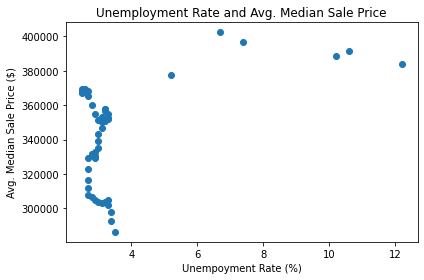

In [27]:
# Plot
plt.scatter(analysis_unemp, analysis_msp)
plt.title("Unemployment Rate and Avg. Median Sale Price")
plt.xlabel("Unempoyment Rate (%)")
plt.ylabel("Avg. Median Sale Price ($)")
plt.tight_layout()
plt.savefig("images/new_msp_unemp_cor.jpeg")

#### Freddie Mac Rate and Median Sale Price

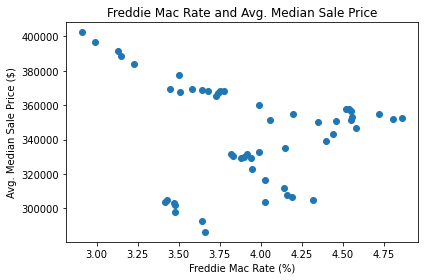

In [28]:
# Plot
plt.scatter(analysis_fmr, analysis_msp)
plt.title("Freddie Mac Rate and Avg. Median Sale Price")
plt.xlabel("Freddie Mac Rate (%)")
plt.ylabel("Avg. Median Sale Price ($)")
plt.tight_layout()
plt.savefig("images/new_fmr_msp_cor.jpeg")

#### Population and Median Sale Price

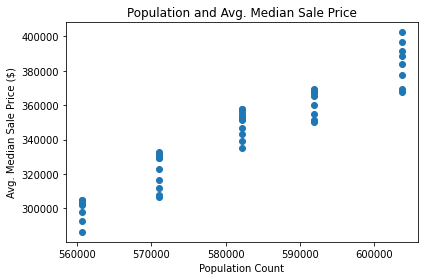

In [29]:
# Plot
plt.scatter(analysis_pop, analysis_msp)
plt.title("Population and Avg. Median Sale Price")
plt.xlabel("Population Count")
plt.ylabel("Avg. Median Sale Price ($)")
plt.tight_layout()
plt.savefig("images/new_pop_msp_cor.jpeg")

## SSAMs by Region Name

In [34]:
# Denver SSAM
denver_ssam = ssam_df[ssam_df["Region Name"].str.contains("Denver")].groupby("Year-Month").first()

In [35]:
# Colorado Springs SSAM
co_springs_ssam = ssam_df[ssam_df["Region Name"].str.contains("Colorado Springs")].groupby("Year-Month").first()

In [36]:
# Greeley SSAM
greeley_ssam = ssam_df[ssam_df["Region Name"].str.contains("Greeley")].groupby("Year-Month").first()

### Boxplots: Regions

#### Denver

Text(0.5, 0.98, '')

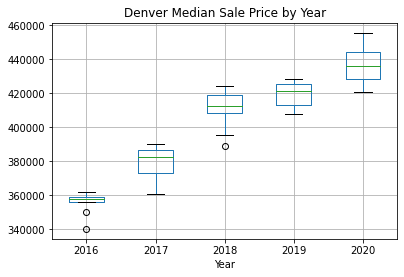

In [45]:
denver_ssam.boxplot(by="Year", column="Value").set_title("")
plt.title("Denver Median Sale Price by Year")
plt.suptitle("")

#### Colorado Springs

Text(0.5, 0.98, '')

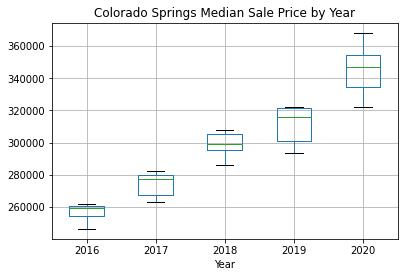

In [44]:
co_springs_ssam.boxplot(by="Year", column="Value").set_title("")
plt.title("Colorado Springs Median Sale Price by Year")
plt.suptitle("")

#### Greeley

Text(0.5, 0.98, '')

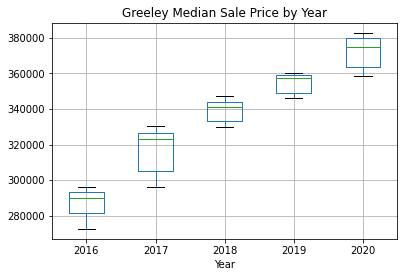

In [43]:
greeley_ssam.boxplot(by="Year", column="Value")
plt.title("Greeley Median Sale Price by Year")
plt.suptitle("")